Constructing a Polynomial Regression: An Example

Model weights: 
[[11.4160685]]


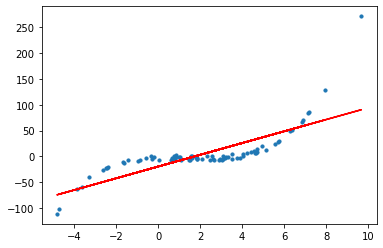

In [19]:
#Linear Regression 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#Building a Dummy Dataset:
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 100)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 100)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

#spliting the data [80:20]
x_train = x[:-20]
y_train = y[:-20]

x_test = x[-20:]
y_test = y[-20:]

model = LinearRegression()
model.fit(x_train, y_train)
print("Model weights: ")
print(model.coef_)

#here, we call predict on the training set because we want to see the fit of the model on the training set. 
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

plt.scatter(x_train, y_train, s=10)
plt.plot(x_train, y_train_pred, color='r')
plt.show()


Original Features: [x]
[-3.29215704]
Polynomial Features: [1,x,x**2]
[ 1.         -3.29215704 10.83829796]
Model weights: 
[[0.         7.22599268 1.0992131 ]]

Training RMSE: 24.395169585394573
Training R2: 0.696595238721916

Test RMSE: 18.958147188630619
Test R2: 0.312829511125536


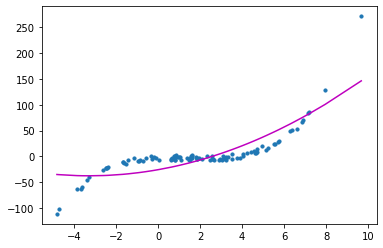

In [23]:
#Constructing a 2nd order Polynomail Regression
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

#Using the same Dummy Dataset
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 100)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 100)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]
print('Original Features: [x]')
print(x[0])

#  Generate a new feature matrix consisting of all polynomial combinations of the 
## features with degree less than or equal to the specified degree. For example, 
## if an input sample is two dimensional and of the form [a, b], 
## the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)
print('Polynomial Features: [1,x,x**2]')
print(x_poly[0])

x_poly_train = x_poly[:-20]
y_train = y[:-20]

x_poly_test = x_poly[-20:]
y_test = y[-20:]

model = LinearRegression()
model.fit(x_poly_train, y_train)
y_train_pred = model.predict(x_poly_train)
y_test_pred = model.predict(x_poly_test)


print("Model weights: ")
print(model.coef_)

rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
r2 = r2_score(y_train,y_train_pred)
print('\nTraining RMSE: %8.15f' % rmse)
print('Training R2: %8.15f' % r2)

# Reporting for the test set:
rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))
r2_test = r2_score(y_test,y_test_pred)
print('\nTest RMSE: %8.15f' % rmse_test)
print('Test R2: %8.15f' % r2_test)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_train_pred), key=sort_axis)
x_poly_train, y_train_pred = zip(*sorted_zip)
plt.plot(x_poly_train, y_train_pred, color='m')
plt.show()


Original Features: [x]
[-3.29215704]
Polynomial Features: [1,x,x**2,x**3]
[  1.          -3.29215704  10.83829796 -35.68137892]
Model weights: 
[[ 0.          0.90216542 -2.01095101  0.50074037]]

Training RMSE: 2.991353849540036
Training R2: 0.995438052457929

Test RMSE: 3.431740027623186
Test R2: 0.977483469140174


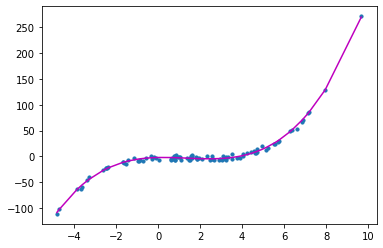

In [21]:
#Polynomail Regression
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

#Using the same Dummy Dataset
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 100)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 100)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]
print('Original Features: [x]')
print(x[0])

#  Generate a new feature matrix consisting of all polynomial combinations of the 
## features with degree less than or equal to the specified degree. 
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)
print('Polynomial Features: [1,x,x**2,x**3]')
print(x_poly[0])

x_poly_train = x_poly[:-20]
y_train = y[:-20]

x_poly_test = x_poly[-20:]
y_test = y[-20:]

model = LinearRegression()
model.fit(x_poly_train, y_train)
y_train_pred = model.predict(x_poly_train)
y_test_pred = model.predict(x_poly_test)

print("Model weights: ")
print(model.coef_)

rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
r2 = r2_score(y_train,y_train_pred)
print('\nTraining RMSE: %8.15f' % rmse)
print('Training R2: %8.15f' % r2)

# Reporting for the test set:
rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))
r2_test = r2_score(y_test,y_test_pred)
print('\nTest RMSE: %8.15f' % rmse_test)
print('Test R2: %8.15f' % r2_test)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_train_pred), key=sort_axis)
x_poly_train, y_train_pred = zip(*sorted_zip)
plt.plot(x_poly_train, y_train_pred, color='m')
plt.show()

Model weights: 
[[ 0.00000000e+00  8.56310783e-01 -5.57878946e-01  7.95828450e-01
  -4.69280721e-01 -8.52552969e-02  8.66158308e-02  3.46065471e-03
  -7.74088139e-03  5.67338041e-04  2.84523917e-04 -4.79045336e-05
  -1.55885189e-06  9.34765487e-07 -8.00455784e-08  2.25955305e-09]]

Training RMSE: 2.823490243925290
Training R2: 0.995935685639745

Test RMSE: 3.093046329405810
Test R2: 0.981708658045789


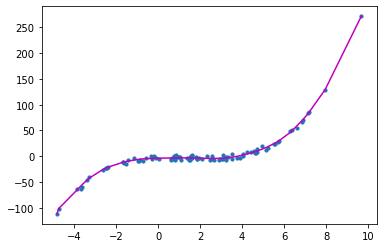

In [22]:
#Polynomail Regression
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

#Using the same Dummy Dataset
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 100)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 100)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]


#  Generate a new feature matrix consisting of all polynomial combinations of the 
## features with degree less than or equal to the specified degree. 
polynomial_features= PolynomialFeatures(degree=15)
x_poly = polynomial_features.fit_transform(x)

x_poly_train = x_poly[:-20]
y_train = y[:-20]

x_poly_test = x_poly[-20:]
y_test = y[-20:]

model = LinearRegression()
model.fit(x_poly_train, y_train)
y_train_pred = model.predict(x_poly_train)
y_test_pred = model.predict(x_poly_test)

print("Model weights: ")
print(model.coef_)

rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
r2 = r2_score(y_train,y_train_pred)
print('\nTraining RMSE: %8.15f' % rmse)
print('Training R2: %8.15f' % r2)

# Reporting for the test set:
rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))
r2_test = r2_score(y_test,y_test_pred)
print('\nTest RMSE: %8.15f' % rmse_test)
print('Test R2: %8.15f' % r2_test)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_train_pred), key=sort_axis)
x_poly_train, y_train_pred = zip(*sorted_zip)
plt.plot(x_poly_train, y_train_pred, color='m')
plt.show()


